# Practical Machine Learning
by Sven Mayer

## 	Lecture 11: Over and Underfitting

The material is licensed under the Creative Commons Attribution-Share Alike 4.0 (CC BY-SA) license: https://creativecommons.org/licenses/by-sa/4.0

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import sys
print("Python version: ", sys.version)
import numpy as np
print("numpy version", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
print("matplotlib version", matplotlib.__version__)
import tensorflow as tf
print("TF:", tf.__version__)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if (len(physical_devices) > 0):
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("TF: No GPU found")

import pandas as pd

from tqdm import tqdm

Python version:  3.9.1 (default, Jan  8 2021, 17:17:17) 
[Clang 12.0.0 (clang-1200.0.32.28)]
numpy version 1.19.5
matplotlib version 3.3.3
INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TF: 2.5.0-rc0
TF: No GPU found


# Traditional Example

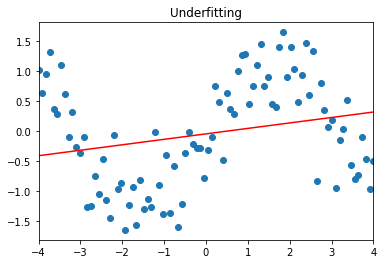

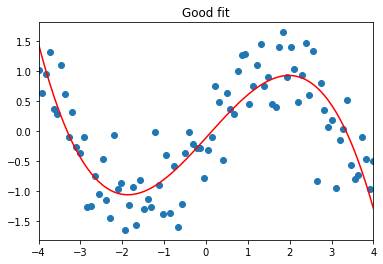

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81718e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


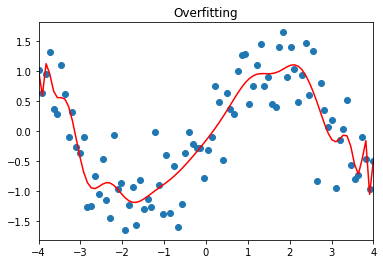

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

x = np.linspace(-4,4,9*10)
r = np.random.RandomState(42)
y = np.sin(x) + r.normal(size=len(x)) * 0.5

reg = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter (x, y)
plt.plot (x, reg.predict(x.reshape(-1, 1)), c="r")
plt.xlim(-4, 4)
plt.title("Underfitting")
plt.savefig("./figures/11_fit_u.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

model = make_pipeline(PolynomialFeatures(degree=3), Ridge())
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
plt.scatter (x, y)
plt.plot (x,  model.predict(x.reshape(-1, 1)), c="r")
plt.xlim(-4, 4)
plt.title("Good fit")
plt.savefig("./figures/11_fit_n.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

model = make_pipeline(PolynomialFeatures(degree=30), Ridge())
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
plt.scatter (x, y)
plt.plot (x,  model.predict(x.reshape(-1, 1)), c="r")
plt.xlim(-4, 4)
plt.title("Overfitting")
plt.savefig("./figures/11_fit_o.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# ML Model

In [10]:
df = pd.read_pickle("./dataKnckleTouch/knuckletouch_only3ps.pkl")

In [11]:
dfTrain = df[df.userID.isin([1,2])]
dfValidation = df[df.userID.isin([3])]

x_train = np.stack(dfTrain.Blob1D.to_list())
y_train = np.stack(dfTrain.Label.to_list())
print(x_train.shape, y_train.shape)

x_val = np.stack(dfValidation.Blob1D.to_list())
y_val = np.stack(dfValidation.Label.to_list())
print(x_val.shape, y_val.shape)

input_size = x_val.shape[1:]
print(input_size)

(14662, 400) (14662, 2)
(6342, 400) (6342, 2)
(400,)


# Underfitting

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 8)                 3208      
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                 18        
Total params: 3,226
Trainable params: 3,226
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
459/459 [==============================] - 1s 1ms/step - loss: 42.2298 - accuracy: 0.3397 - val_loss: 1.9345 - val_accuracy: 0.7512
Epoch 2/25
459/459 [==============================] - 0s 860us/step - loss: 3.0677 - accuracy: 0.5859 - val_loss: 1.0440 - val_accuracy: 0.8042
Epoch 3/25
459/459 [==============================] - 0s 887us/step - loss: 1.7666 - accuracy: 

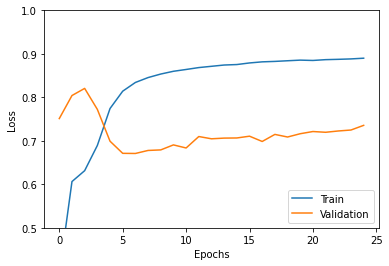

In [14]:
def getModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_size, name = "InputLayer"))

    model.add(tf.keras.layers.Flatten())
    #model.add(tf.keras.layers.Dense(128, name = "HiddenLayer1", activation='relu'))
    model.add(tf.keras.layers.Dense(8, name = "HiddenLayer1", activation='relu'))
    model.add(tf.keras.layers.Dense(2, name = "OutputLayer", activation='softmax'))
    return model



model = getModel()

model.summary()

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
lossFunction = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])
history = model.fit(x_train, y_train,
                validation_data = (x_val, y_val),
                epochs=25,
                verbose=1)

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")

plt.ylim(.5, 1)
#plt.text (0.1,.9, "$lr=0.001$", size=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=4)
plt.savefig("./figures/11_fitting_under.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Overfitting

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 512)               205312    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 256)               131328    
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                 514       
Total params: 337,154
Trainable params: 337,154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
459/459 [==============================] - 2s 3ms/step - loss: 0.5944 - accuracy: 0.8424 - val_loss: 0.7794 - val_accuracy: 0.8091
Epoch 2/50
459/459 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9298 - va

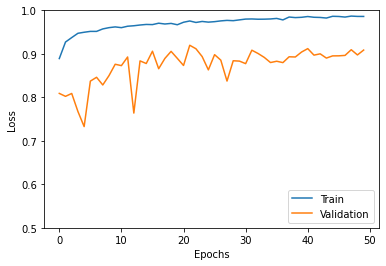

In [6]:
def getModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_size, name = "InputLayer"))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, name = "HiddenLayer1", activation='relu'))
    model.add(tf.keras.layers.Dense(256, name = "HiddenLayer2", activation='relu'))
    model.add(tf.keras.layers.Dense(2, name = "OutputLayer", activation='softmax'))
    return model



model = getModel()

model.summary()

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
lossFunction = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])
history = model.fit(x_train, y_train,
                validation_data = (x_val, y_val),
                epochs=50,
                verbose=1)

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")

plt.ylim(0.5, 1)
#plt.text (0.1,.9, f"$lr={learning_rate}$", size=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=4)
plt.savefig("./figures/11_fitting_over.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# "Good" Fit

In [8]:
x_train_2 = np.stack(dfTrain.Blob1D.to_list()).reshape((-1, 20,20,1))
y_train_2 = np.stack(dfTrain.Label.to_list())
print(x_train.shape, y_train.shape)

x_val_2 = np.stack(dfValidation.Blob1D.to_list()).reshape((-1, 20,20,1))
y_val_2 = np.stack(dfValidation.Label.to_list())
print(x_val.shape, y_val.shape)

input_size = x_val_2.shape[1:]
print(input_size)

(14662, 400) (14662, 2)
(6342, 400) (6342, 2)
(20, 20, 1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2592)              0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 64)                165952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                

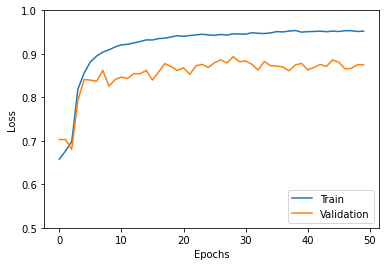

In [9]:
def getModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer(input_size, name = "InputLayer"))
    
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), name = "Conv1", activation='relu'))
    
    model.add(tf.keras.layers.MaxPool2D())
    
    model.add(tf.keras.layers.Dropout(.5))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, name = "HiddenLayer1", activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.001)))
    model.add(tf.keras.layers.Dropout(.2))
    model.add(tf.keras.layers.Dense(2, name = "OutputLayer", activation='softmax'))
    return model



model = getModel()

model.summary()

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
lossFunction = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])
history = model.fit(x_train_2, y_train_2,
                validation_data = (x_val_2, y_val_2),
                epochs=50,
                verbose=1)

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")

plt.ylim(0.5, 1)
#plt.text (0.1,.9, f"$lr={learning_rate}$", size=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=4)
plt.savefig("./figures/11_fitting.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()